In [3]:
import vizdoom as vzd
import numpy as np
import matplotlib.pyplot as plt
import random
import time
import sys
sys.path.append('../DataGeneration')

from matplotlib import pyplot as plt
from local_map import look_around
from local_map import map_to_black


(240, 320)
[134.17538452 500.2789917    0.         188.61877446]
[134.17538452 500.2789917    0.          98.61877444]
var3: [107.1622467  678.59831238   0.          98.61877444]


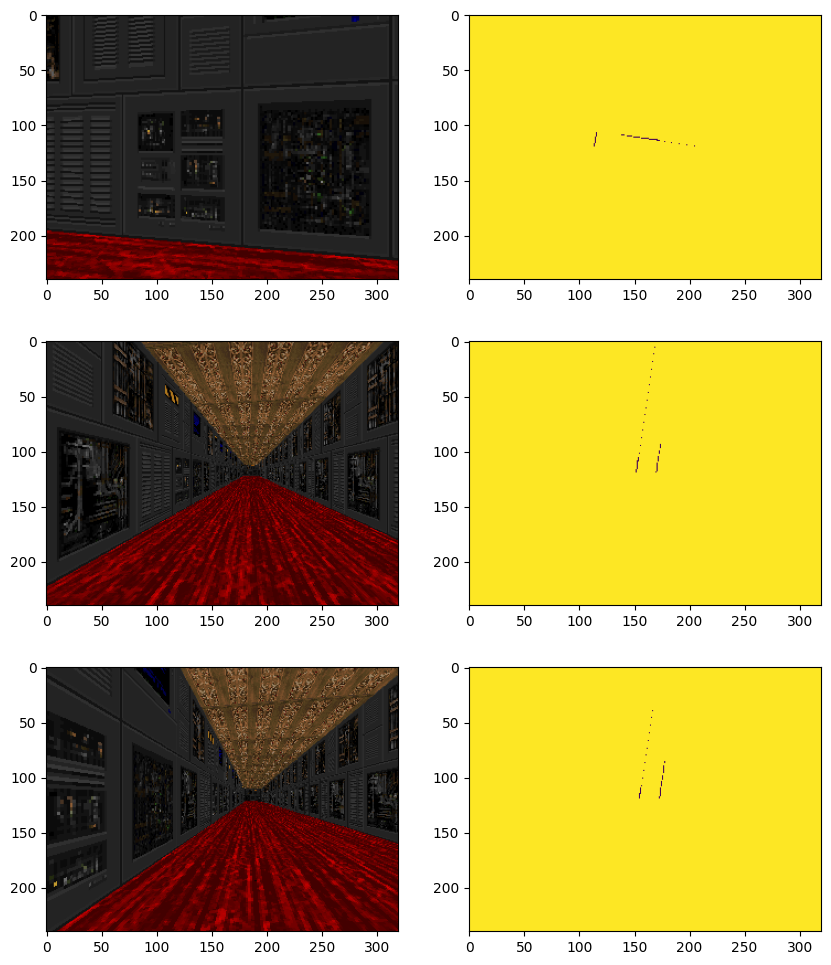

In [5]:



game = vzd.DoomGame()
game.load_config('../data/resources/datagen.cfg')
game.set_doom_scenario_path('../data/maps_1key_noaug/30x30.wad')

game.set_automap_mode(vzd.AutomapMode.WHOLE)
game.set_seed(1)
game.set_render_hud(False)
game.set_objects_info_enabled(True)
game.set_screen_format(vzd.ScreenFormat.RGB24)
game.set_labels_buffer_enabled(True)
game.set_render_corpses(True)
game.set_doom_map('map03')
game.init()
game.new_episode()
game.get_state()

st1 = game.get_state()

cam1 = st1.screen_buffer
#print(len(st1.objects))

for obj in st1.objects:
    if obj.name == 'RedCard':
        if obj.id == 0:
            print('Found')

mp1 = look_around(st1)
print(mp1.shape)

var1 = st1.game_variables

print(var1)

game.make_action([0,0, 90, 0, 0], 1)

st2 = game.get_state()

var2 = st2.game_variables

print(var2)

cam2 = st2.screen_buffer

mp2 = look_around(st2)
 # Walking action takes more frames to complete (19 in this case). This is because of hard cap on speed.
# game.make_action([0,0, 45, 0, 0], 1)
game.make_action([0,0, 0, 110, 0], 19)

st3 = game.get_state()

cam3 = st3.screen_buffer

mp3 = look_around(st3)
var3 = st3.game_variables
print("var3:", var3)
fig, axs = plt.subplots(3, 2, figsize=(10, 12))

axs[0, 0].imshow(cam1)
axs[0, 1].imshow(mp1)
axs[1, 0].imshow(cam2)
axs[1, 1].imshow(mp2)
axs[2, 0].imshow(cam3)
axs[2, 1].imshow(mp3)

plt.show()


In [6]:
def make_action(game, action, frames):
    game.make_action(action, frames)
    st = game.get_state()
    map = look_around(st)
    var = st.game_variables

    return map, var

# делает шаг симуляции по акшну

In [7]:
def plot_map(lst, alpha=1):

    arr = np.array(lst).T
    plt.plot(arr[0]+160, arr[1], '.', color='C0', alpha=alpha)
    # plt.axis('equal')

    # печатает список точек с лидара


In [64]:
def rot_matrix(a):
    return np.array([[np.cos(a), np.sin(a)],
                    [-np.sin(a), np.cos(a)]]) 

def arr_2_lst(arr):
    ret = []
    
    for i in range(arr.shape[0]):
        for j in range(arr.shape[1]):
            if arr[i, j] == 0:
                ret.append(np.array([i, j]))

    return ret
# переебывает карту с лидара в список точек

def rot_lst(lst, a, x0=np.array([120, 160])):
    mat = rot_matrix(a)
    ret = []
    # print('from rot', a)


    for point in lst:
        point_ = mat @ (point - x0) + x0
        ret.append(point_)

    return ret
# вращает точки лидара вокруг героя

def tra_lst(lst, step):
    step = np.array(step)
    ret = []

    for point in lst:
        point_ = point + step
        ret.append(point_)

    return ret
# двигает точки лидара

def points_to_map(points, size=(500, 500)):
    # conver list of points into an image
    img = np.full(size, 255)
    for point in points:
        img[int(point[0]), int(point[1])] = 0
    return img
    

In [74]:
game = vzd.DoomGame()
game.load_config('../data/resources/datagen.cfg')
game.set_doom_scenario_path('../data/maps_1key_noaug/30x30.wad')

game.set_automap_mode(vzd.AutomapMode.WHOLE)
game.set_seed(125)
game.set_render_hud(False)
game.set_objects_info_enabled(True)
game.set_screen_format(vzd.ScreenFormat.RGB24)
game.set_labels_buffer_enabled(True)
game.set_render_corpses(True)
game.set_doom_map('map03')
game.init()
game.new_episode()

start_pos = map_to_black(game.get_state().automap_buffer)
# я хуй знает чо тут происходит

In [75]:
N = 80 * 5 / 2 # я пытался 
frames = 10
maps = []
vars = []
# for i in range(int(N)):
# собираю список состояний игры
for i in range(4):
    # print(i)
    start_state = game.get_state()
    start_state = start_state.game_variables
    #print(start_state)
    #action = [0,0, 0, 100, 0] # тупо иду вперед невзирая ни на что
    #map, var = make_action(game, action, frames)
    # maps.append(map)
    # vars.append(var)
    # но покрутиться тоже надо
    #ang_range = 170 # можно настраивать
    #ang = random.randint(-ang_range, ang_range)
    action = [0,0, 90, 0, 0]
    map, var = make_action(game, action, 1)
    maps.append(map)
    vars.append(var)
    time.sleep(0.01)


In [76]:
print(vars)

[array([1211.89759827,  684.15872192,    0.        ,  305.68359382]), array([1211.89759827,  684.15872192,    0.        ,  215.6835938 ]), array([1211.89759827,  684.15872192,    0.        ,  125.68359378]), array([1211.89759827,  684.15872192,    0.        ,   35.68359376])]


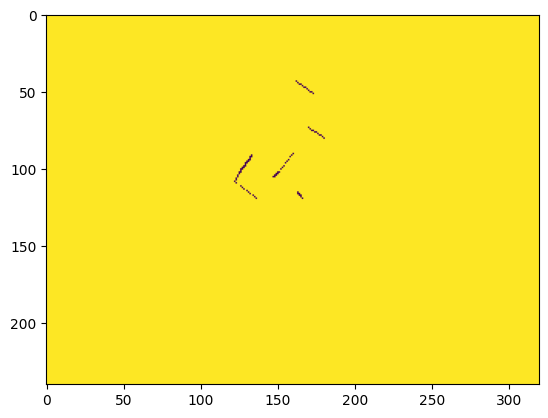

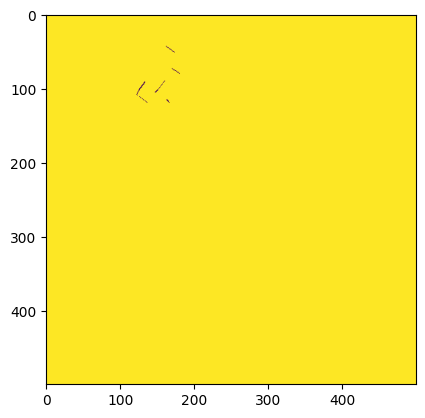

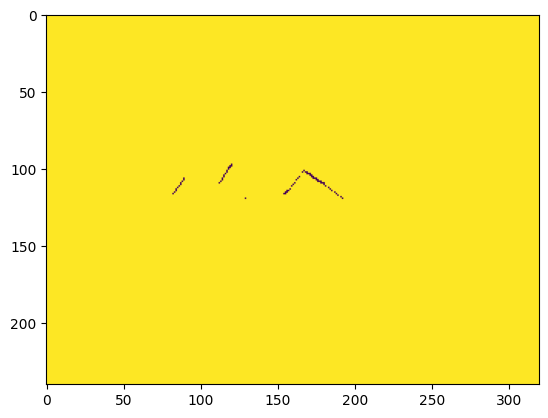

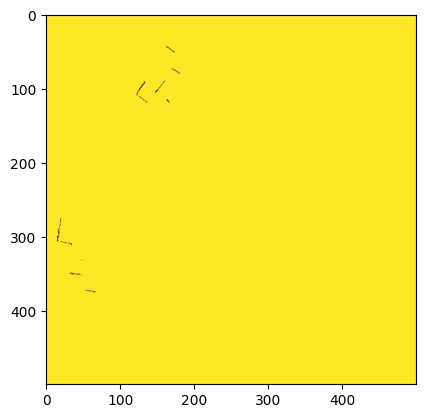

In [77]:
from icecream import ic
global_map_pts = []
start_coord = np.array(vars[0][:2])
start_ang = vars[0][3]
for i in range(2):
    map = maps[i]
    plt.imshow(map)
    plt.show()
    coord = vars[i][:2]
    ang = vars[i][3]
    pts = arr_2_lst(map)
    pts_clean = pts.copy()
    coord_diff = coord - start_coord
    ang_diff = ang - start_ang
    
    pts = tra_lst(pts, coord_diff)
    pts = rot_lst(pts, ang_diff, x0=coord_diff)
    
    global_map_pts.extend(pts)
    map = points_to_map(global_map_pts)
    plt.imshow(map)
    plt.show()


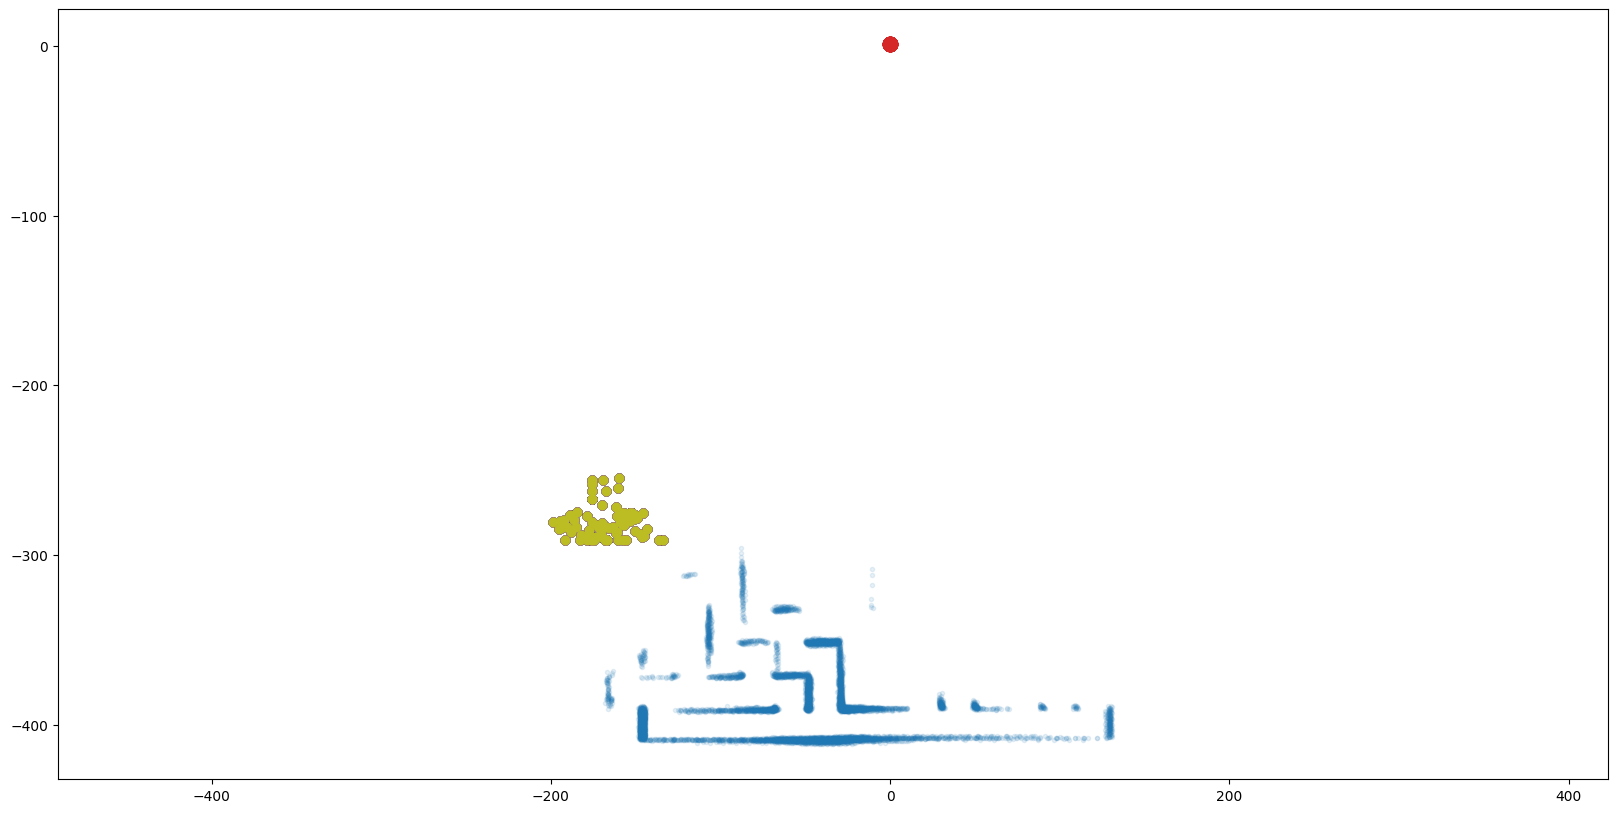

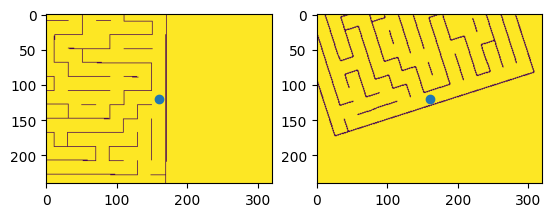

In [41]:
# mps = [mp1, mp2, mp3]
# vas = [var1, var2, var3]


# собираю позиции героя
vars = np.array(vars)
steps = vars[:, :2] / 10 # бля, хуй знает почему-то надо делить на 10
steps -= steps[0]
steps = np.array(rot_lst(steps, np.pi, np.array((0, 0)))) # и прчему-то нужно повернуть на 180 градусов

#start = np.array([97, 100]) # и почему-то надо сместить вот настолько (хуй знает почему)
start = np.array(vars[0][:2]) / 10
plt.figure(figsize=(20, 10))
for i in range(len(maps)):
# for i in range(10):
    lst = arr_2_lst(maps[i]) # точки лидара
    ang = vars[i][3] # повороты героя
    step = vars[i][:2] # позиции героя

    
    lst_ = rot_lst(lst, np.radians(-ang)) # кручу точки лидара по углу героя
    lst__ = tra_lst(lst_, -step/10) # двигаю точки лидара по позиции героя

    buf = np.array(lst__) - start  # двигаю на таинственную константу
    plot_map(buf, alpha=0.1) # рисиую лидар
    # plt.subplot(2, 1, 1, alpha=0.001)


    
    plt.plot((steps-start).T[0], (steps-start).T[1], 'o') # рисую траекторию героя
    
    plt.plot([0], [1], 'o', markersize=10, color='C3') # начало отсчета (не поверишь, ноль)
    plt.axis('equal')

plt.show()

# конечная позиция
plt.subplot(1, 2, 1)
plt.imshow(map_to_black(game.get_state().automap_buffer))
plt.plot(160, 120, 'o')

# начальная позиция
plt.subplot(1, 2, 2)
plt.imshow(start_pos)
plt.plot(160, 120, 'o')



In [123]:
mp3.shape

(240, 320)

[array([ 26, 117]), array([ 27, 116]), array([ 28, 113]), array([ 28, 114]), array([ 28, 115]), array([ 29, 111]), array([ 29, 112]), array([ 29, 113]), array([ 30, 109]), array([ 30, 110]), array([ 30, 111]), array([ 31, 107]), array([ 31, 108]), array([ 31, 109]), array([ 32, 106]), array([ 32, 107]), array([ 33, 104]), array([ 33, 105]), array([ 33, 106]), array([ 34, 102]), array([ 34, 103]), array([ 34, 104]), array([ 35, 101]), array([ 35, 102]), array([ 35, 122]), array([ 40, 125]), array([ 47, 129]), array([ 56, 134]), array([ 61, 137]), array([ 66, 140]), array([ 67, 121]), array([ 68, 121]), array([ 69, 120]), array([ 69, 121]), array([ 70, 119]), array([ 70, 120]), array([ 73, 144]), array([ 86, 131]), array([ 89, 133]), array([ 90, 153]), array([ 91, 134]), array([ 91, 154]), array([ 93, 135]), array([ 93, 155]), array([ 95, 136]), array([ 95, 156]), array([ 97, 157]), array([ 98, 138]), array([ 99, 158]), array([100, 139]), array([100, 159]), array([102, 140]), array([102,

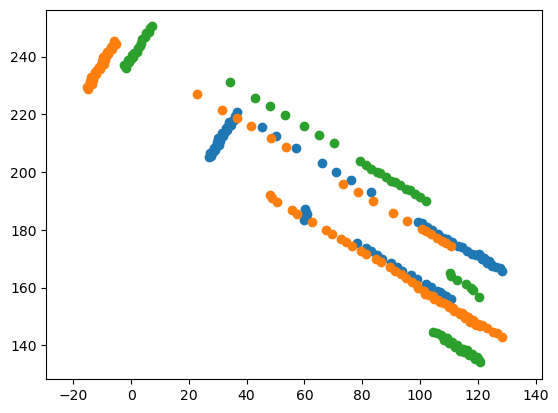

In [53]:
def tra_arr(mp, step):
    
    ret = []
    step = np.array(step)

    for i in range(mp.shape[0]):
        for j in range(mp.shape[1]):
            if mp[i, j] == 0:
        
                i_, j_ = np.array([i, j]) + step
                ret.append(np.array([i_, j_]))
    return ret

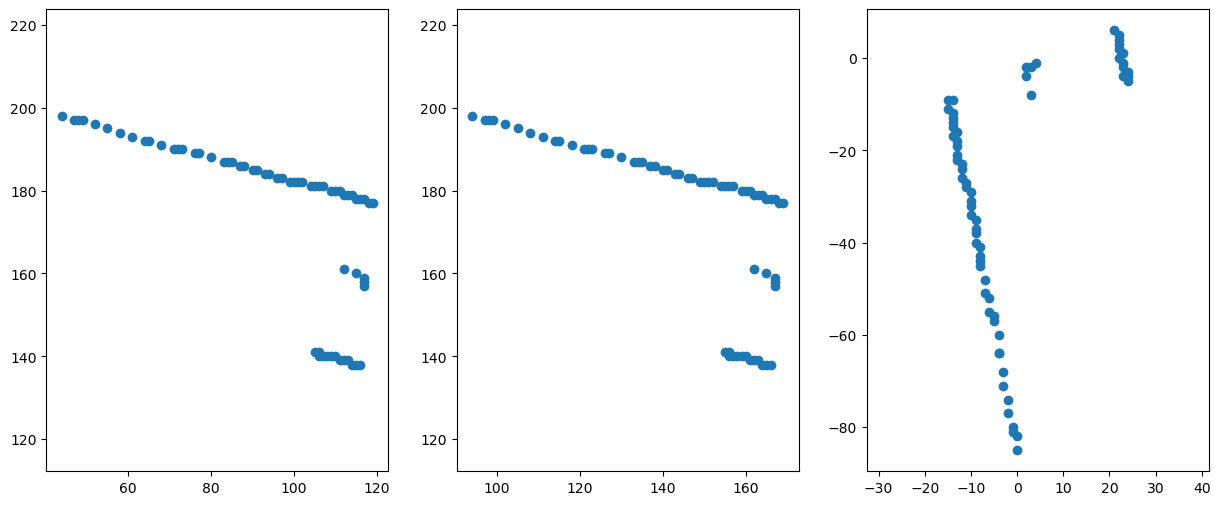

In [66]:
plt.figure(figsize=(15, 6))
plt.subplot(1, 3, 1)
arr = tra_arr(mp3, (0, 0))
plot_map(arr)
plt.subplot(1, 3, 2)
arr = tra_arr(mp3, (50, 0))
plot_map(arr)
plt.subplot(1, 3, 3)
arr = rot_arr(mp3, 90)
plot_map(arr)

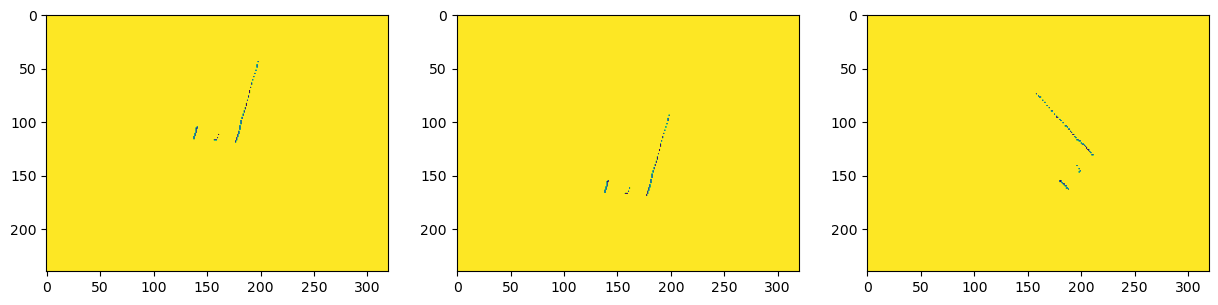

In [49]:

plt.figure(figsize=(15, 6))
plt.subplot(1, 3, 1)
plt.imshow(mp3)
plt.subplot(1, 3, 2)
plt.imshow(tra_arr(mp3, (50, 0)))
plt.subplot(1, 3, 3)
plt.imshow(rot_arr(tra_arr(mp3, (50, 0)), 45))


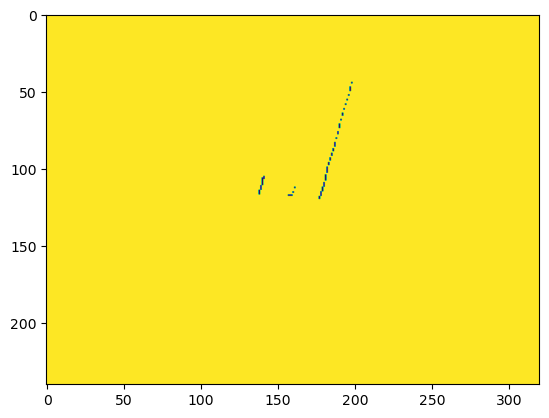

In [8]:
plt.imshow(mp3)

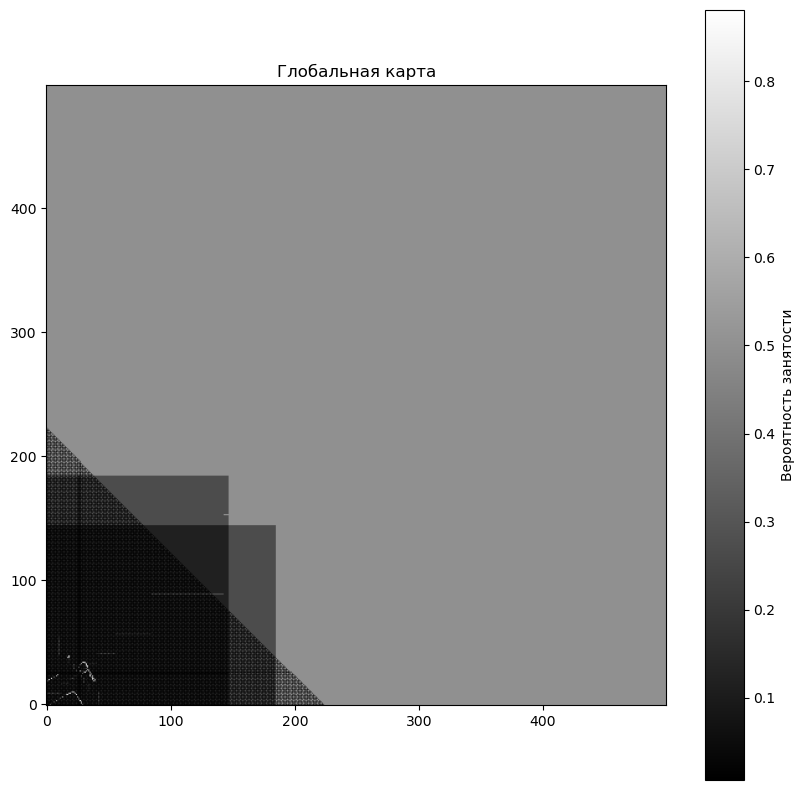

In [67]:
# import numpy as np
# import matplotlib.pyplot as plt
# import sys
# sys.path.append('../')

# from matplotlib import pyplot as plt
# from local_map import look_around

# # Константы
# GLOBAL_MAP_SIZE = 500  # Размер глобальной карты
# RESOLUTION = 10  # Количество пикселей на одну ячейку глобальной карты
# LOG_ODDS_PRIOR = 0.0
# LOG_ODDS_OCCUPIED = 2.0
# LOG_ODDS_FREE = -1.0

# # Функция обновления глобальной карты
# def update_global_map(global_map, local_map, robot_x, robot_y, robot_theta):
#     local_h, local_w = local_map.shape
#     center_x, center_y = local_w // 2, local_h // 2

#     for i in range(local_h):
#         for j in range(local_w):
#             dx = j - center_x
#             dy = i - center_y

#             # Преобразование локальных координат в глобальные
#             global_dx = int(dx * np.cos(np.radians(robot_theta)) - dy * np.sin(np.radians(robot_theta)))
#             global_dy = int(dx * np.sin(np.radians(robot_theta)) + dy * np.cos(np.radians(robot_theta)))
#             global_x = int(robot_x / RESOLUTION) + global_dx
#             global_y = int(robot_y / RESOLUTION) + global_dy

#             if 0 <= global_x < GLOBAL_MAP_SIZE and 0 <= global_y < GLOBAL_MAP_SIZE:
#                 if local_map[i, j] == 0:  # Занятая ячейка
#                     global_map[global_y, global_x] += LOG_ODDS_OCCUPIED
#                 else:  # Свободная ячейка
#                     global_map[global_y, global_x] += LOG_ODDS_FREE

#     return global_map

# # Инициализация DoomGame
# import vizdoom as vzd

# game = vzd.DoomGame()
# game.load_config('C:/Users/daria/Downloads/outputs/datagen.cfg')
# game.set_doom_scenario_path('C:/Users/daria/Downloads/outputs/30x30.wad')
# game.set_automap_mode(vzd.AutomapMode.WHOLE)
# game.set_render_hud(False)
# game.set_objects_info_enabled(True)
# game.set_screen_format(vzd.ScreenFormat.RGB24)
# game.set_labels_buffer_enabled(True)
# game.set_render_corpses(True)
# game.set_doom_map('map03')
# game.init()

# # Получение локальных карт
# game.new_episode()
# st1 = game.get_state()
# mp1 = look_around(st1)
# game.make_action([0, 0, 90, 0, 0], 1)
# st2 = game.get_state()
# mp2 = look_around(st2)
# game.make_action([0, 0, 0, 110, 0], 19)
# game.make_action([0, 0, 45, 0, 0], 1)
# st3 = game.get_state()
# mp3 = look_around(st3)

# # Параметры позиций и углов робота
# robot_positions = [
#     (250, 250, 0),    # Положение робота для mp1
#     (260, 250, 90),   # Положение робота для mp2
#     (270, 260, 135),  # Положение робота для mp3
# ]

# # Построение глобальной карты
# global_map = np.full((GLOBAL_MAP_SIZE, GLOBAL_MAP_SIZE), LOG_ODDS_PRIOR)
# local_maps = [mp1, mp2, mp3]

# for idx, (x, y, theta) in enumerate(robot_positions):
#     global_map = update_global_map(global_map, local_maps[idx], x, y, theta)

# # Преобразование логарифмических шансов в вероятности
# def log_odds_to_probability(log_odds_map):
#     return 1 - 1 / (1 + np.exp(log_odds_map))

# global_probability_map = log_odds_to_probability(global_map)

# # Визуализация
# plt.figure(figsize=(10, 10))
# plt.imshow(global_probability_map, cmap='gray', origin='lower')
# plt.title('Глобальная карта')
# plt.colorbar(label='Вероятность занятости')
# plt.show()


Player Position at Step 1: [250, 250], Orientation: 60.68298341256636


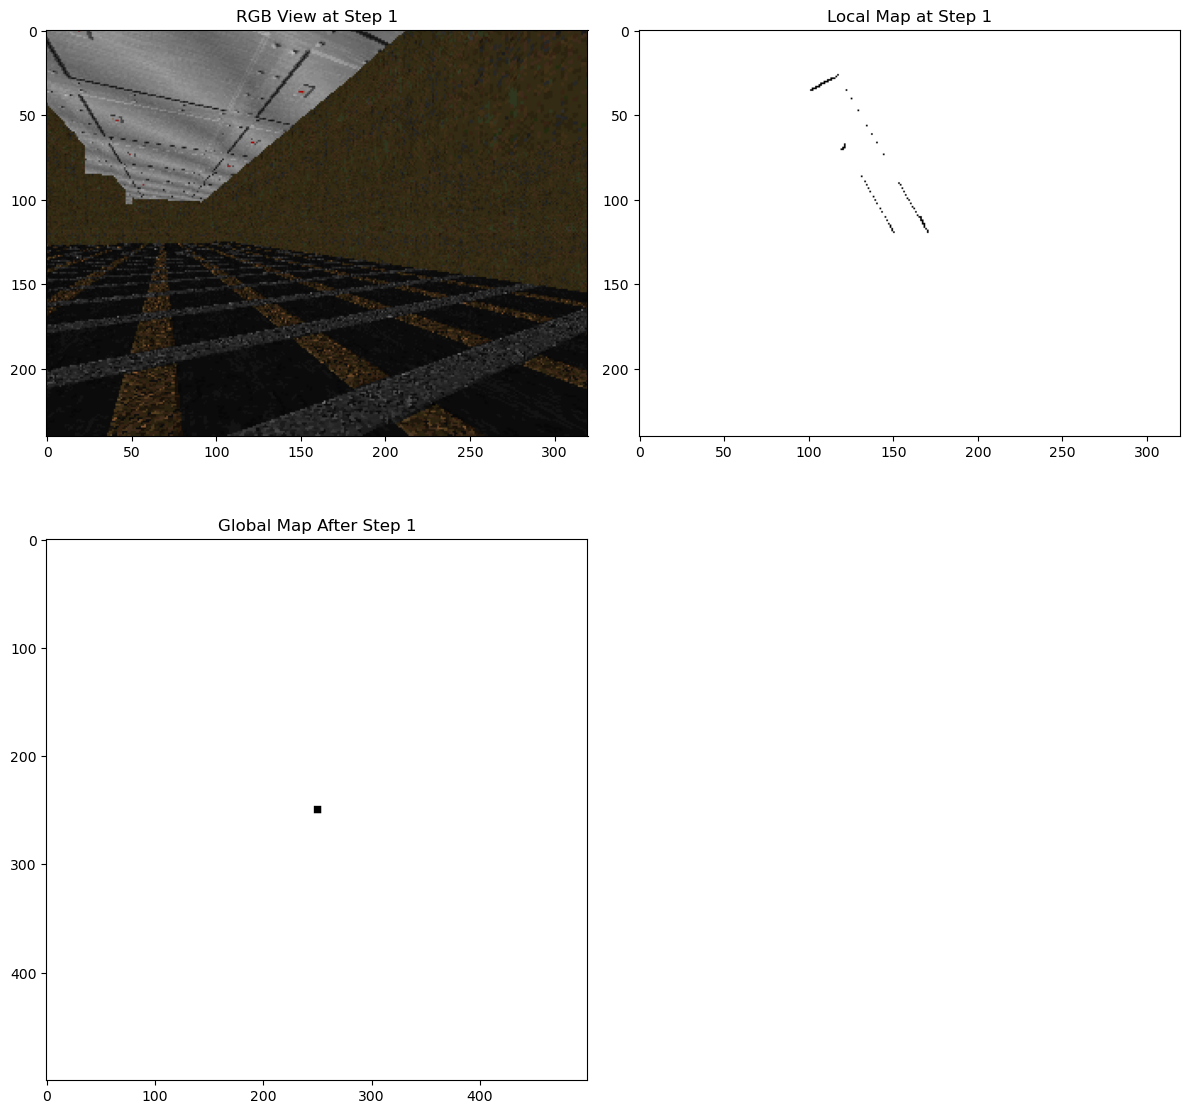

Player Position at Step 2: [259, 252], Orientation: 15.68298340208898


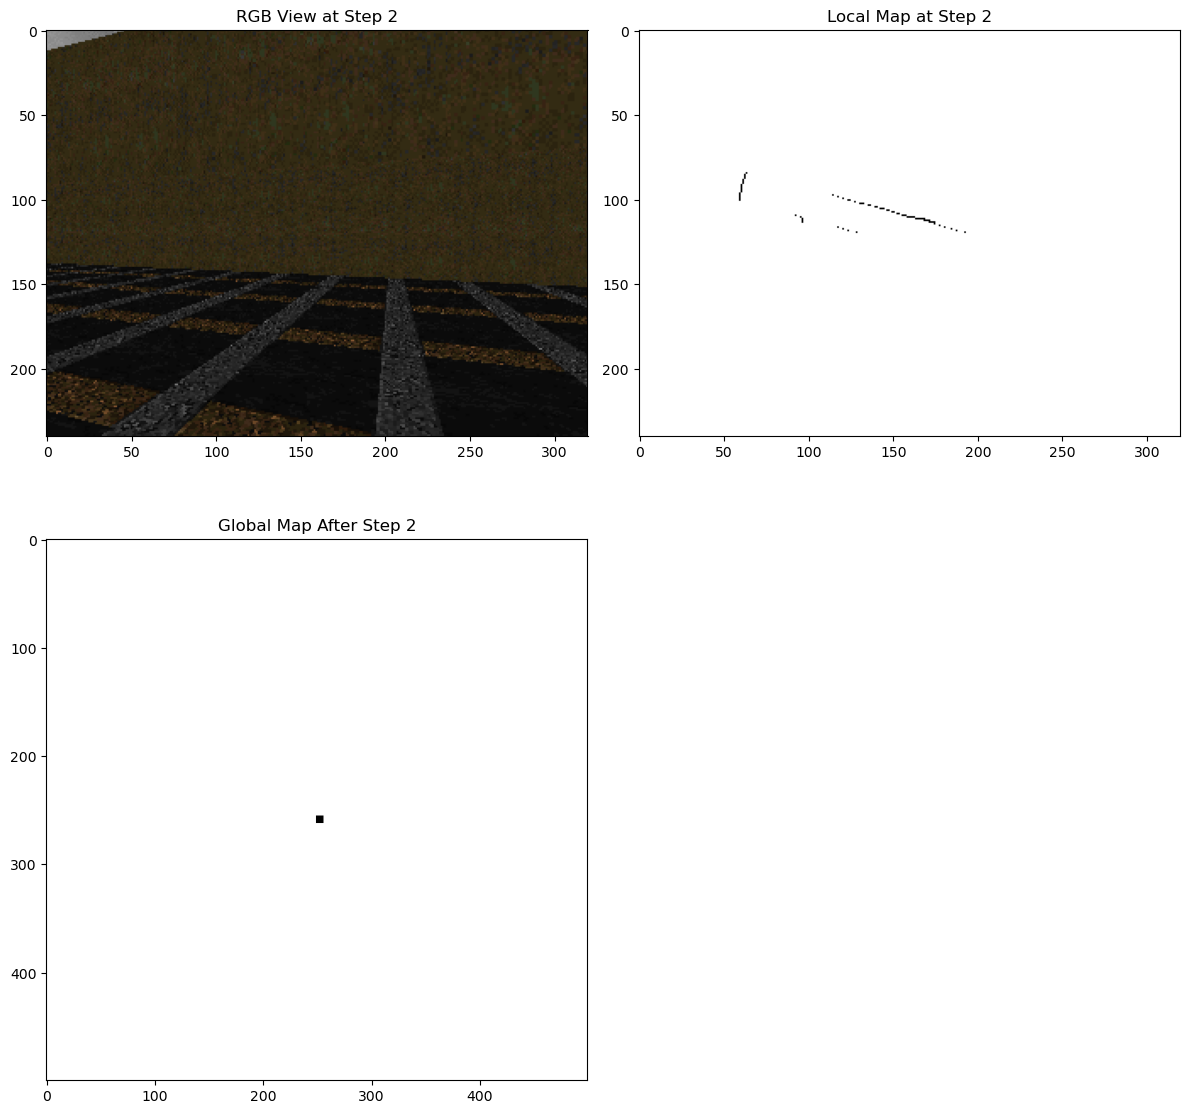

Player Position at Step 3: [259, 252], Orientation: 15.68298340208898


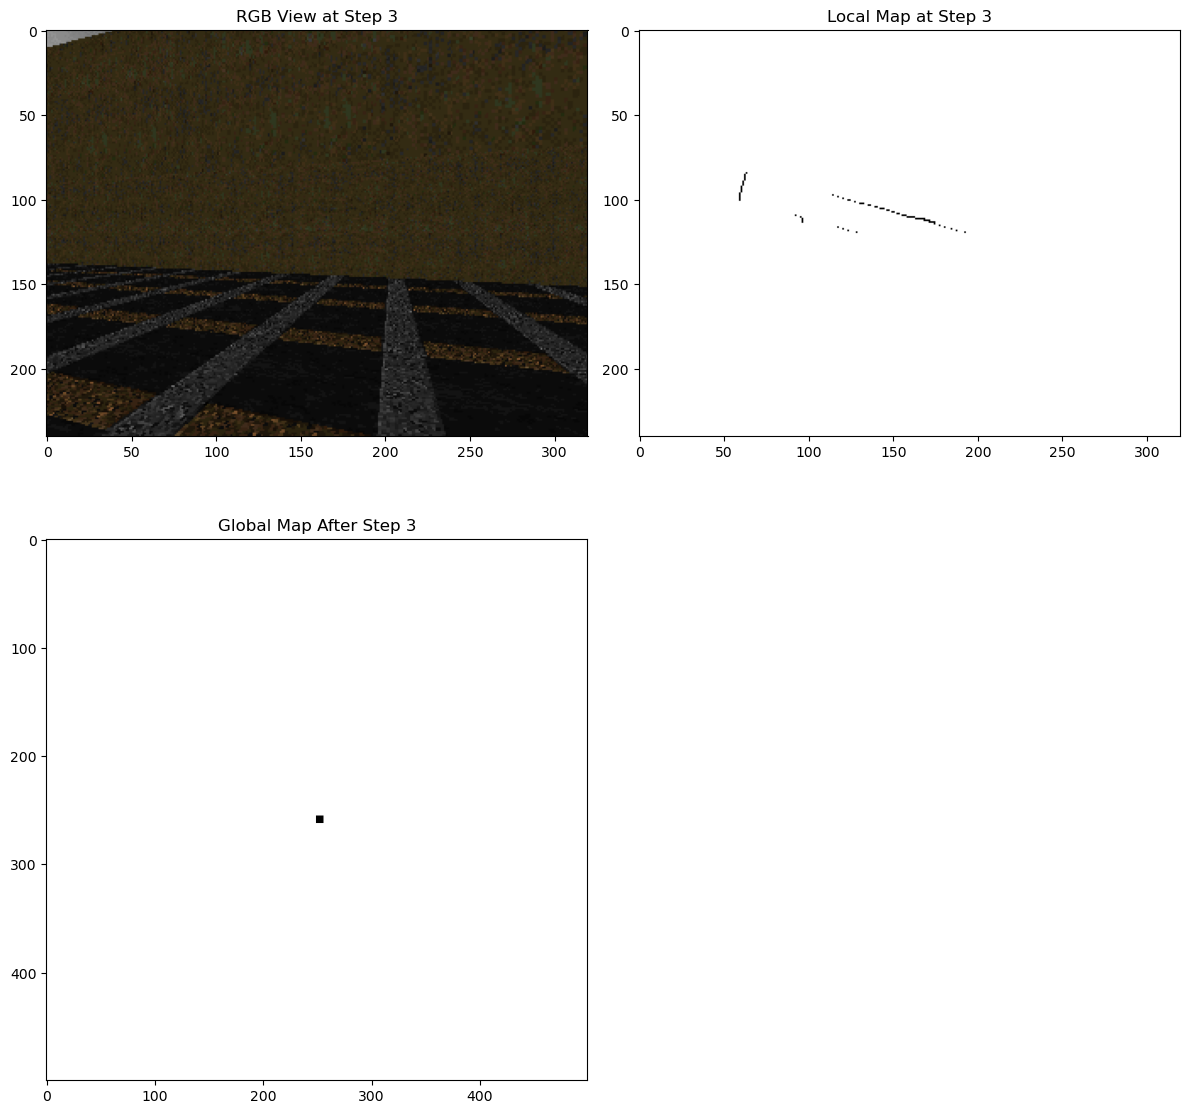

Player Position at Step 4: [267, 248], Orientation: 330.68298347543066


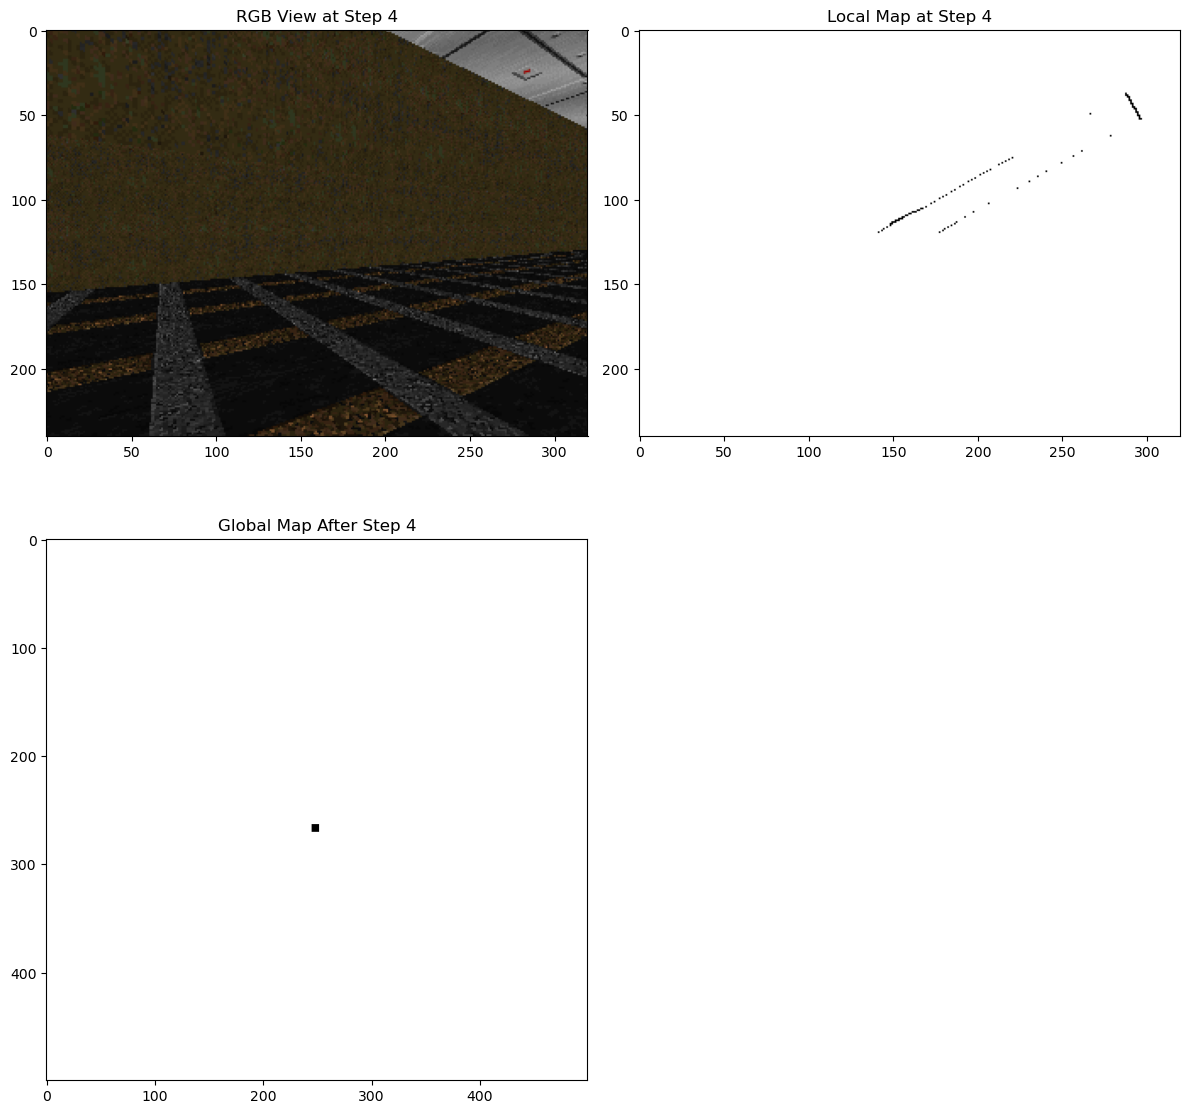

Player Position at Step 5: [267, 248], Orientation: 330.68298347543066


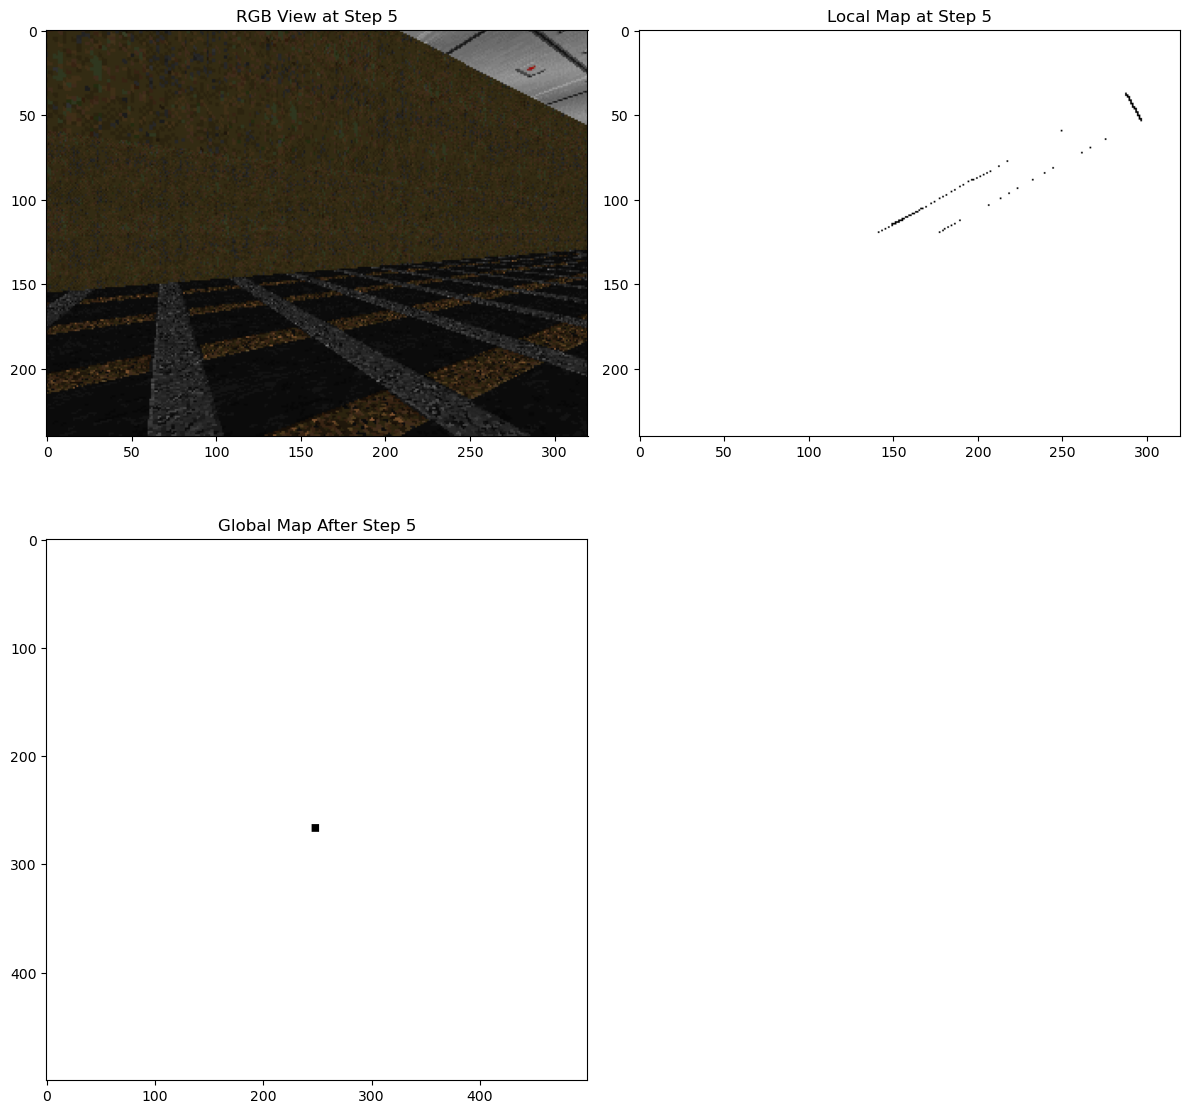

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import rotate
import sys
sys.path.append('../')

from local_map import look_around
import vizdoom as vzd

def update_global_map(global_map, local_map, player_position, player_orientation, local_map_resolution=1):
    """
    Updates the global map using the local map and player position.

    :param global_map: Global map (numpy array)
    :param local_map: Local map (numpy array)
    :param player_position: Global player coordinates (x, y)
    :param player_orientation: Player orientation (angle in degrees)
    :param local_map_resolution: Local map resolution (cell size in space units)
    :return: Updated global map
    """
    local_center = (local_map.shape[0] // 2, local_map.shape[1] // 2)
    local_map_rotated = rotate(local_map, -player_orientation, reshape=False, mode='constant', cval=255)

    for i in range(local_map.shape[0]):
        for j in range(local_map.shape[1]):
            dx = (i - local_center[0]) * local_map_resolution
            dy = (j - local_center[1]) * local_map_resolution

            global_x = int(player_position[0] + dx * np.cos(np.radians(player_orientation)) - dy * np.sin(np.radians(player_orientation)))
            global_y = int(player_position[1] + dx * np.sin(np.radians(player_orientation)) + dy * np.cos(np.radians(player_orientation)))

            if 0 <= global_x < global_map.shape[0] and 0 <= global_y < global_map.shape[1]:
                if local_map_rotated[i, j] == 0:
                    global_map[global_x, global_y] = 0

    return global_map

# Initialize DoomGame
game = vzd.DoomGame()
game.load_config('C:/Users/daria/Downloads/outputs/datagen.cfg')
game.set_doom_scenario_path('C:/Users/daria/Downloads/outputs/30x30.wad')

game.set_automap_mode(vzd.AutomapMode.WHOLE)
game.set_render_hud(False)
game.set_objects_info_enabled(True)
game.set_screen_format(vzd.ScreenFormat.RGB24)
game.set_labels_buffer_enabled(True)
game.set_render_corpses(True)
game.set_doom_map('map03')
game.init()
game.new_episode()

# Initialize global map
global_map_size = (500, 500)  # Map size
global_map = np.ones(global_map_size) * 255
player_position = [250, 250]  # Player start position

# Function to visualize maps
def visualize_step(step, cam, local_map, global_map, player_position, player_orientation):
    print(f"Player Position at Step {step}: {player_position}, Orientation: {player_orientation}")
    global_map_with_player = global_map.copy()
    player_x, player_y = int(player_position[0]), int(player_position[1])
    if 0 <= player_x < global_map_with_player.shape[0] and 0 <= player_y < global_map_with_player.shape[1]:
        global_map_with_player[player_x - 3:player_x + 4, player_y - 3:player_y + 4] = 0  # Mark player as red

    fig, axs = plt.subplots(2, 2, figsize=(12, 12))
    axs[0, 0].imshow(cam)
    axs[0, 0].set_title(f'RGB View at Step {step}')
    axs[0, 1].imshow(local_map, cmap='gray')
    axs[0, 1].set_title(f'Local Map at Step {step}')
    axs[1, 0].imshow(global_map_with_player, cmap='gray')
    axs[1, 0].set_title(f'Global Map After Step {step}')
    axs[1, 1].axis('off')
    plt.tight_layout()
    plt.show()

# Simulate multiple steps
for step in range(1, 6):
    # Get the game state
    state = game.get_state()
    cam = state.screen_buffer
    local_map = look_around(state)
    var = state.game_variables
    player_orientation = var[3]  # Player orientation from var

    # Simulate an action (alternate between moving and rotating)
    if step % 2 == 0:
        action = [0, 0, 0, 100, 0]  # Move forward
        player_position[0] += int(10 * np.cos(np.radians(player_orientation)))
        player_position[1] += int(10 * np.sin(np.radians(player_orientation)))
    else:
        action = [0, 0, 45, 0, 0]  # Rotate
    game.make_action(action, 1)

    # Update the global map
    global_map = update_global_map(global_map, local_map, player_position, player_orientation)

    # Visualize the step
    visualize_step(step, cam, local_map, global_map, player_position, player_orientation)


Player Position at Step 1: [250, 250], Orientation: 337.5494385551543


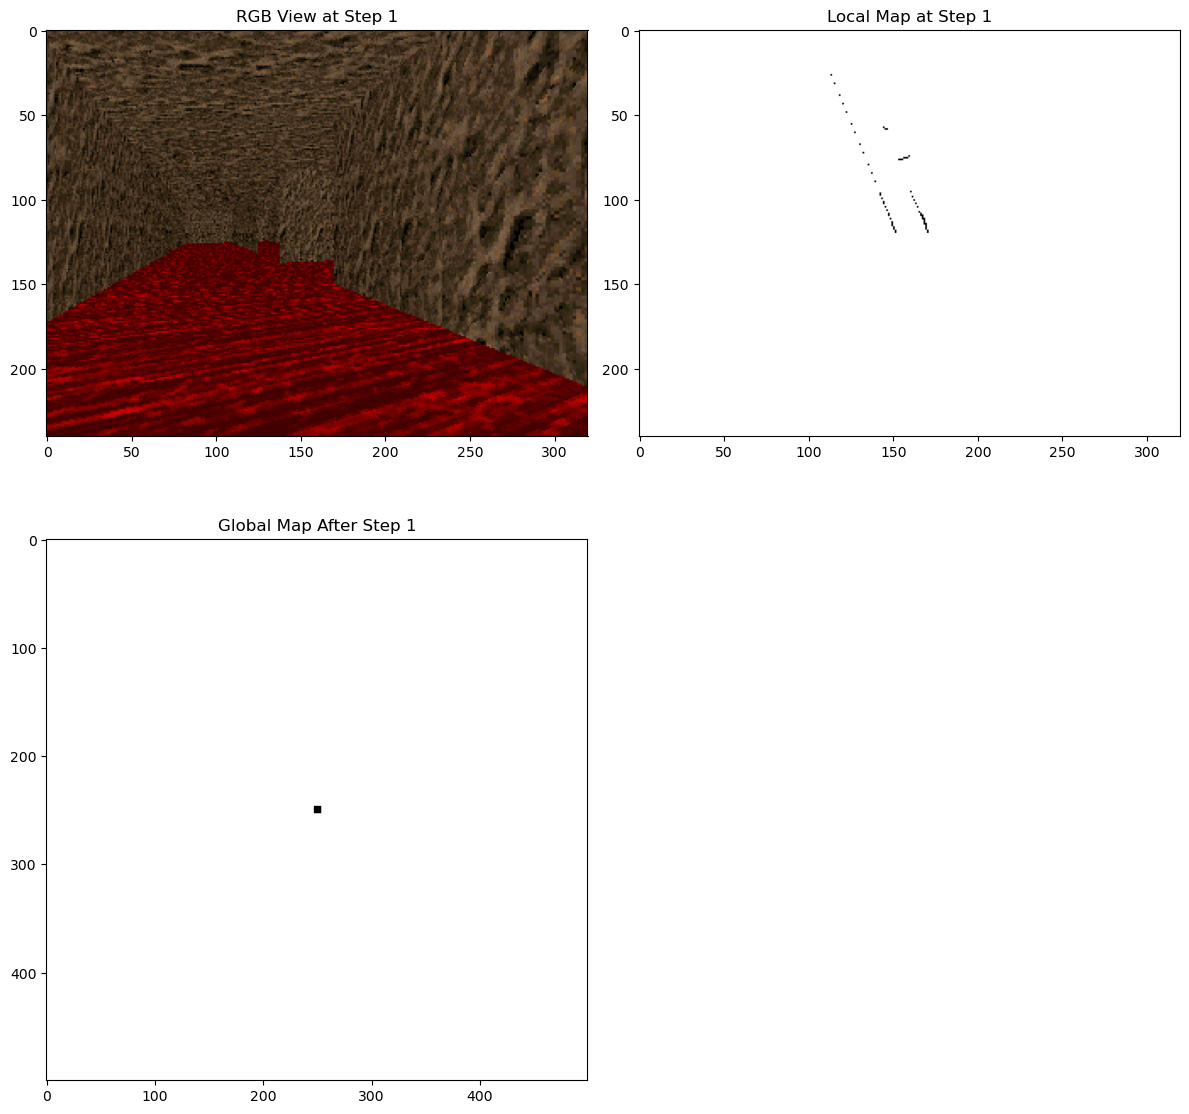

Player Position at Step 2: [253, 241], Orientation: 292.54943854467695


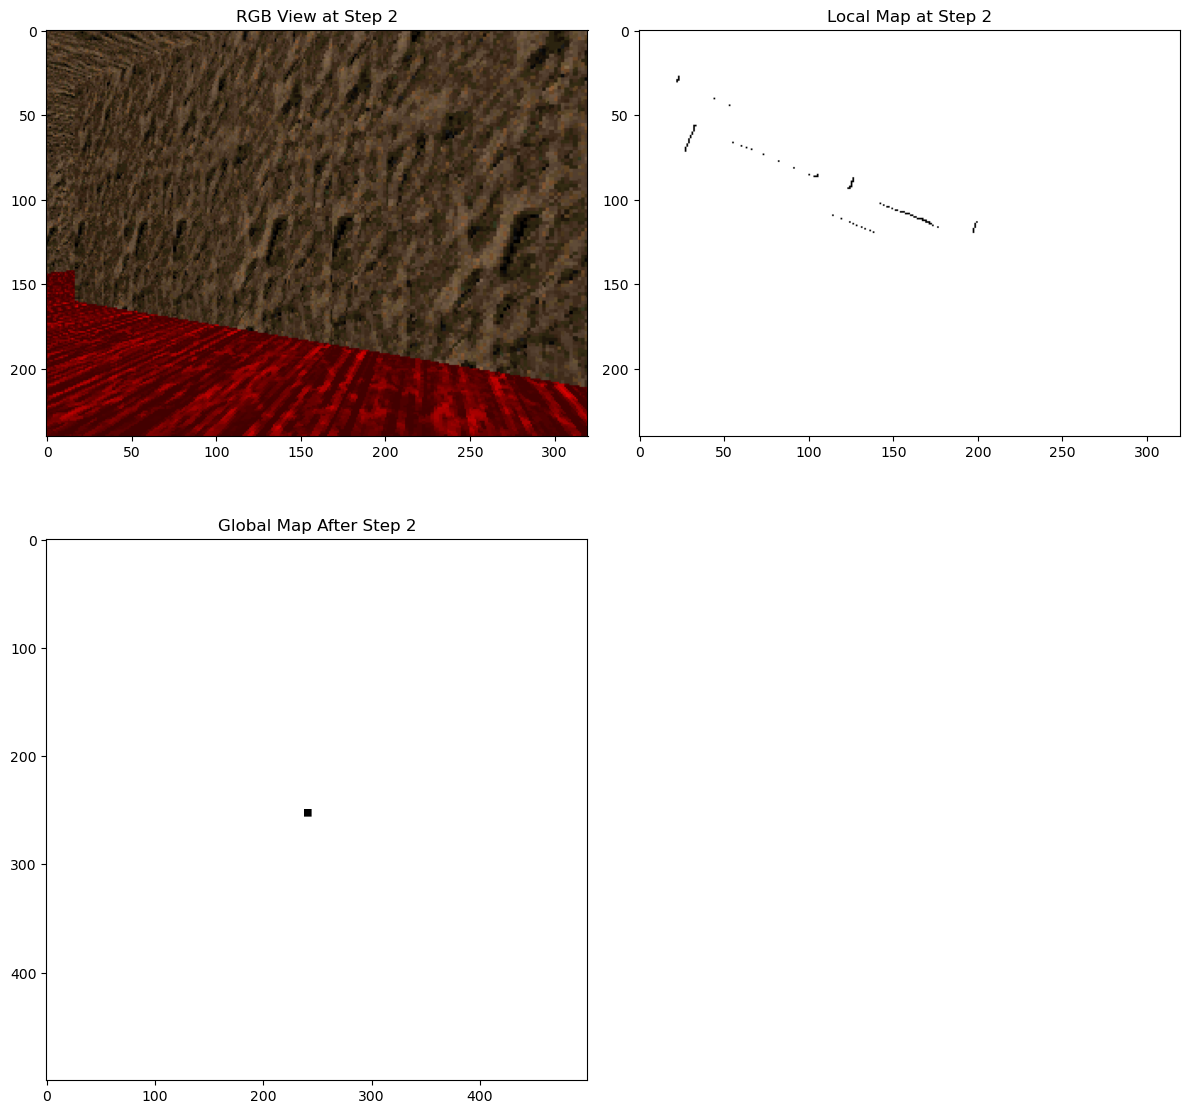

Player Position at Step 3: [253, 241], Orientation: 292.54943854467695


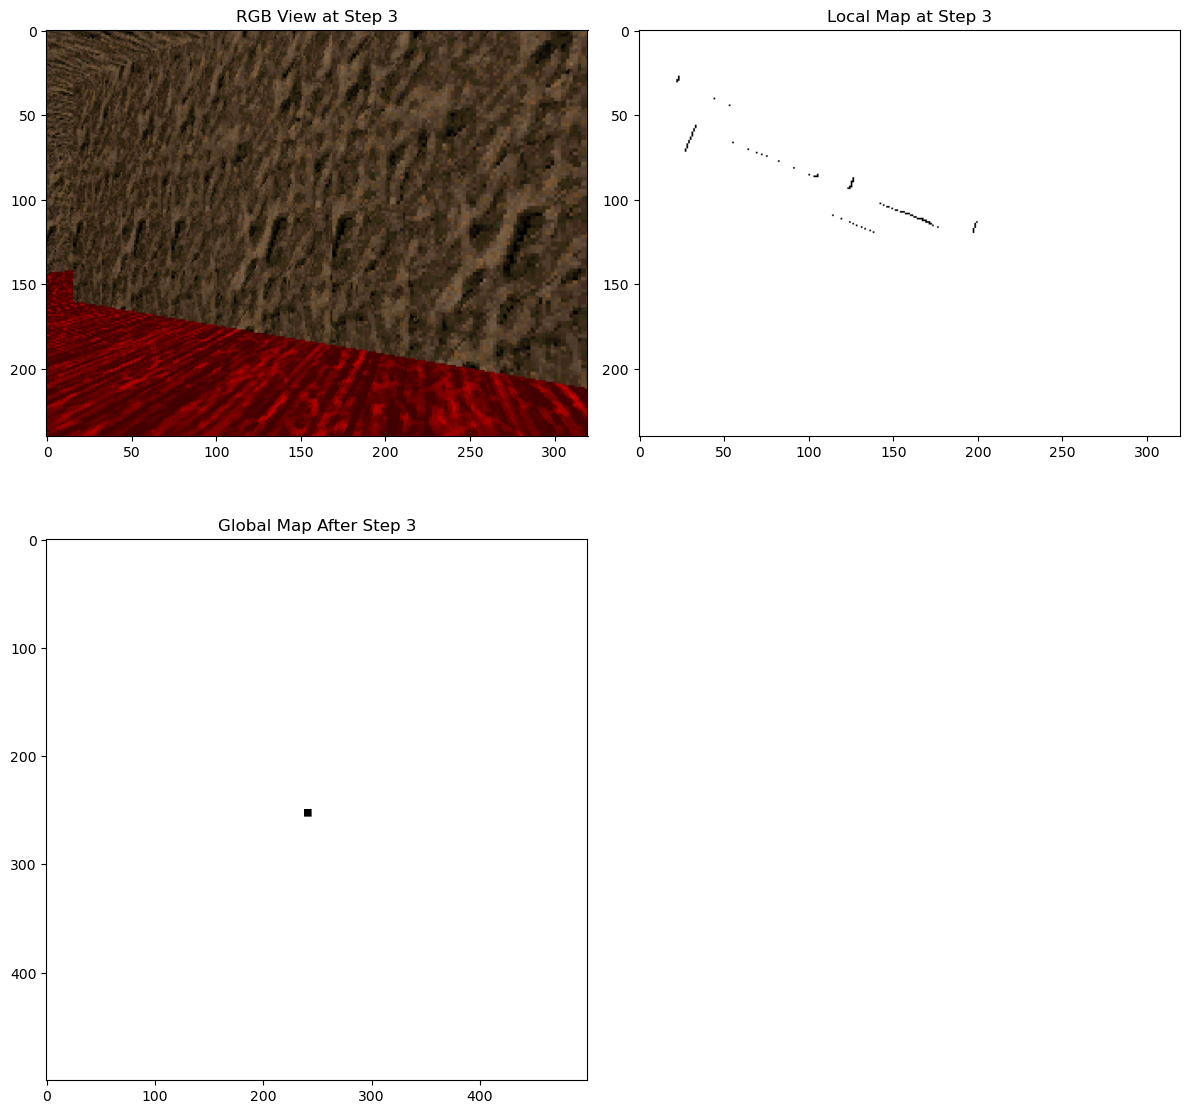

Player Position at Step 4: [250, 232], Orientation: 247.5494385341996


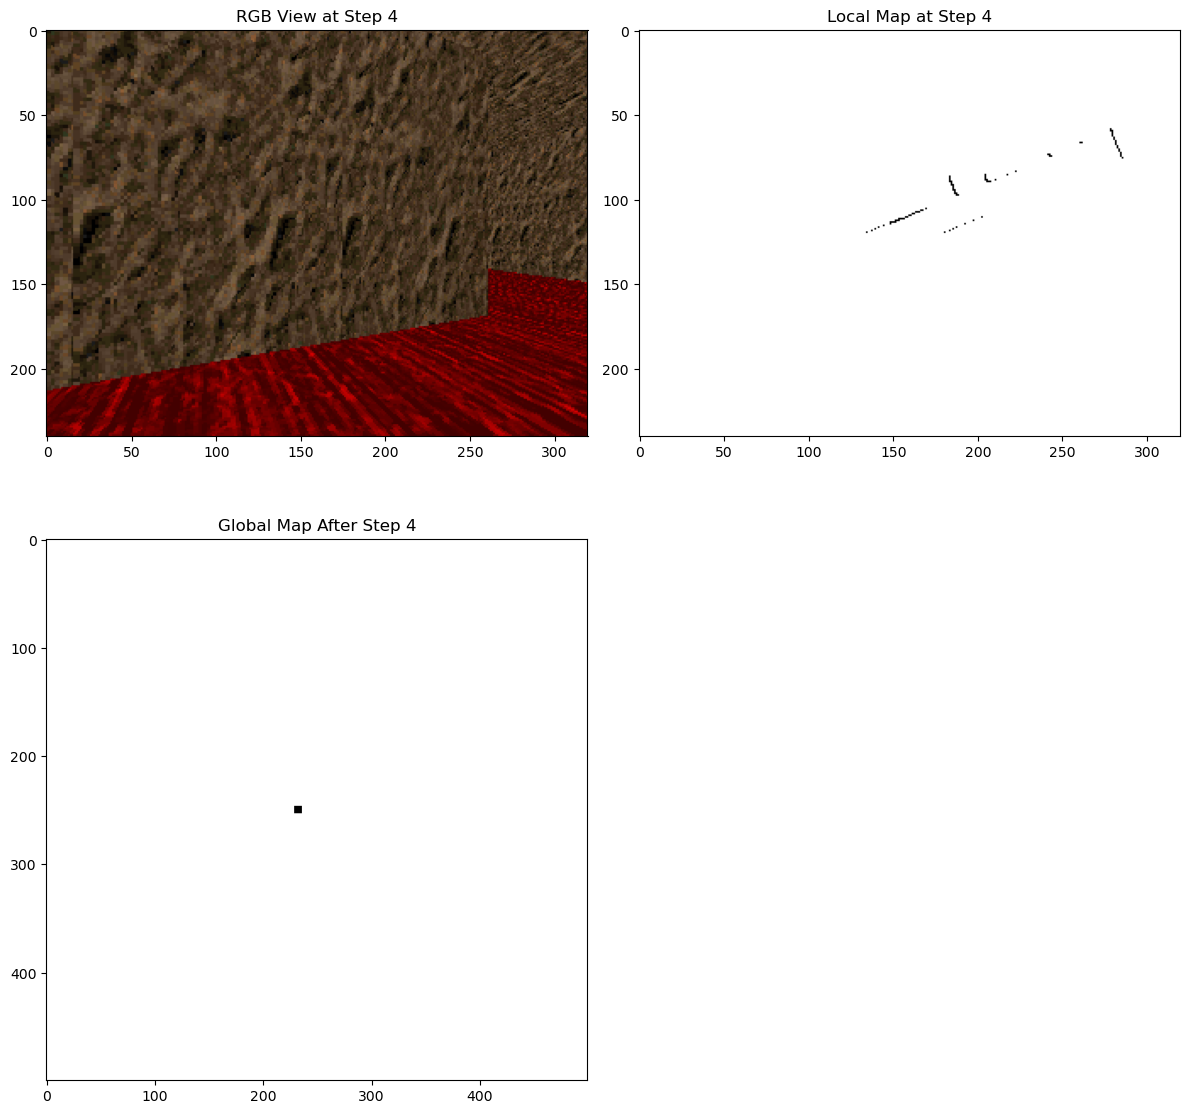

Player Position at Step 5: [250, 232], Orientation: 247.5494385341996


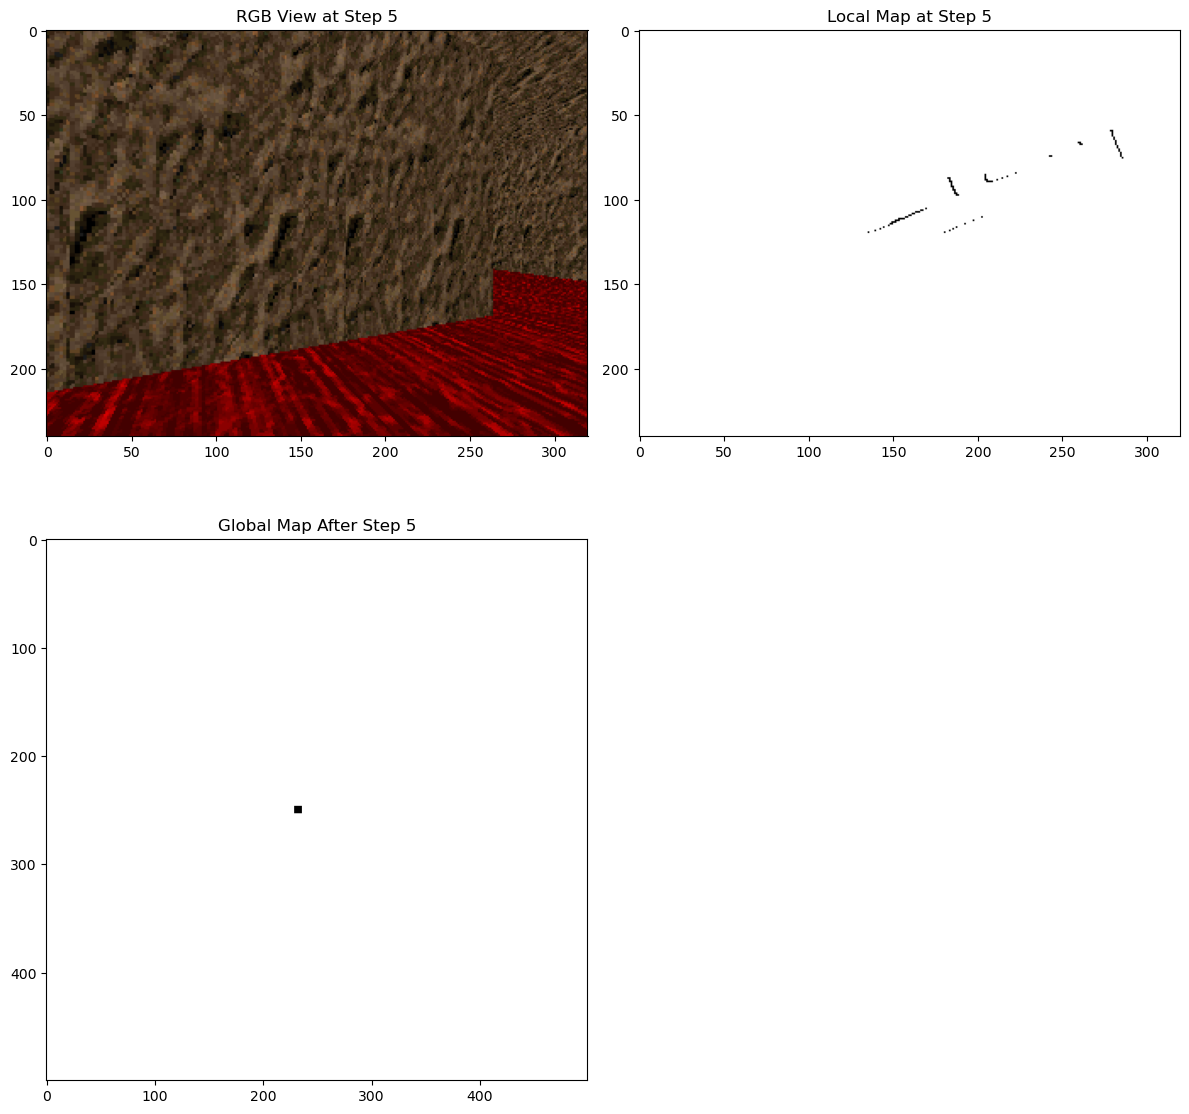

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import rotate
import sys
sys.path.append('../')

from local_map import look_around
import vizdoom as vzd

def update_global_map(global_map, local_map, player_position, player_orientation, local_map_resolution=1):
    """
    Updates the global map using the local map and player position.

    :param global_map: Global map (numpy array)
    :param local_map: Local map (numpy array)
    :param player_position: Global player coordinates (x, y)
    :param player_orientation: Player orientation (angle in degrees)
    :param local_map_resolution: Local map resolution (cell size in space units)
    :return: Updated global map
    """
    local_center = (local_map.shape[0] // 2, local_map.shape[1] // 2)
    local_map_rotated = rotate(local_map, -player_orientation, reshape=False, mode='constant', cval=255)

    for i in range(local_map.shape[0]):
        for j in range(local_map.shape[1]):
            dx = (i - local_center[0]) * local_map_resolution
            dy = (j - local_center[1]) * local_map_resolution

            global_x = int(player_position[0] + dx * np.cos(np.radians(player_orientation)) - dy * np.sin(np.radians(player_orientation)))
            global_y = int(player_position[1] + dx * np.sin(np.radians(player_orientation)) + dy * np.cos(np.radians(player_orientation)))

            if 0 <= global_x < global_map.shape[0] and 0 <= global_y < global_map.shape[1]:
                if local_map_rotated[i, j] == 0:
                    global_map[global_x, global_y] = 0

    return global_map

# Initialize DoomGame
game = vzd.DoomGame()
game.load_config('C:/Users/daria/Downloads/outputs/datagen.cfg')
game.set_doom_scenario_path('C:/Users/daria/Downloads/outputs/30x30.wad')

game.set_automap_mode(vzd.AutomapMode.WHOLE)
game.set_render_hud(False)
game.set_objects_info_enabled(True)
game.set_screen_format(vzd.ScreenFormat.RGB24)
game.set_labels_buffer_enabled(True)
game.set_render_corpses(True)
game.set_doom_map('map03')
game.init()
game.new_episode()

# Initialize global map
global_map_size = (500, 500)  # Map size
global_map = np.ones(global_map_size) * 255
player_position = [250, 250]  # Player start position

# Function to visualize maps
def visualize_step(step, cam, local_map, global_map, player_position, player_orientation):
    print(f"Player Position at Step {step}: {player_position}, Orientation: {player_orientation}")
    global_map_with_player = global_map.copy()
    player_x, player_y = int(player_position[0]), int(player_position[1])
    if 0 <= player_x < global_map_with_player.shape[0] and 0 <= player_y < global_map_with_player.shape[1]:
        global_map_with_player[player_x - 3:player_x + 4, player_y - 3:player_y + 4] = 0  # Mark player as red

    fig, axs = plt.subplots(2, 2, figsize=(12, 12))
    axs[0, 0].imshow(cam)
    axs[0, 0].set_title(f'RGB View at Step {step}')
    axs[0, 1].imshow(local_map, cmap='gray')
    axs[0, 1].set_title(f'Local Map at Step {step}')
    axs[1, 0].imshow(global_map_with_player, cmap='gray')
    axs[1, 0].set_title(f'Global Map After Step {step}')
    axs[1, 1].axis('off')
    plt.tight_layout()
    plt.show()

# Simulate multiple steps
for step in range(1, 6):
    # Get the game state
    state = game.get_state()
    cam = state.screen_buffer
    local_map = look_around(state)
    var = state.game_variables
    player_orientation = var[3]  # Player orientation from var

    # Simulate an action (alternate between moving and rotating)
    if step % 2 == 0:
        action = [0, 0, 0, 100, 0]  # Move forward
        player_position[0] += int(10 * np.cos(np.radians(player_orientation)))
        player_position[1] += int(10 * np.sin(np.radians(player_orientation)))
    else:
        action = [0, 0, 45, 0, 0]  # Rotate
    game.make_action(action, 1)

    # Update the global map
    global_map = update_global_map(global_map, local_map, player_position, player_orientation)

    # Visualize the step
    visualize_step(step, cam, local_map, global_map, player_position, player_orientation)


у меня задача построить глобальную карту при обновлении локальной карты. Это нужно сделать с помощью Overview of Occupancy Grid Mapping Algorithm. У меня есть код local_map import vizdoom as vzd
import numpy as np
import matplotlib.pyplot as plt

possible_actions = np.zeros((8,6),dtype=int).tolist()
possible_actions[0] = [1,0,0,0,0]
possible_actions[1] = [0,1,0,0,0]
possible_actions[2] = [0,0,-45,0,0]
possible_actions[3] = [0,0,45,0,0]
possible_actions[4] = [0,0,0,50,0]
possible_actions[5] = [0,0,0,-50,0]
possible_actions[6] = [0,0,0,0,30]
possible_actions[7] = [0,0,0,0,-30]

def map_to_black(raw_map: np.array):
    """
    Receives colour map from VizDoom.
    Returns black and white map of walls only.
    Walls are black 0, background is white 255.
    Player icon removed.
    """
    grayscale = np.dot(raw_map[...,:3], [0.2989, 0.5870, 0.1140])
    
    grey_threshold = 100
    grey_mask = (grayscale > grey_threshold)
    
    black_threshold = 80
    black_mask = (grayscale < black_threshold)
    
    grayscale[grey_mask | black_mask] = 0
    grayscale[~(grey_mask | black_mask)] = 255
        
    grayscale[118:123,158:161] = [255]
    
    return grayscale

def thicken_walls(grey_map: np.array):
    map = grey_map.copy()
    for i in range(map.shape[0]):
        for j in range(map.shape[1]):
            if grey_map[i,j] == 0:
                map[i-1:i+1,j-1:j+1] = 0
    return map

def ray_casting(grey_map: np.array):
    height, width = grey_map.shape
    center_y, center_x = height // 2, width // 2
    processed_map = grey_map.copy()

    # Only get black pixels from upper half of image
    black_pixels = np.argwhere((grey_map[:center_y] == 0))
    
    # No need for center mask since we're only looking at upper half
    dy = black_pixels[:,0] - center_y
    dx = black_pixels[:,1] - center_x

    abs_dy = np.abs(dy)
    abs_dx = np.abs(dx)
    sign_y = np.where(dy != 0, np.sign(dy), 0).astype(int)
    sign_x = np.where(dx != 0, np.sign(dx), 0).astype(int)

    dx_dominant = abs_dx > abs_dy
    pdx = np.where(dx_dominant, sign_x, 0)
    pdy = np.where(dx_dominant, 0, sign_y)
    es = np.where(dx_dominant, abs_dy, abs_dx)
    el = np.where(dx_dominant, abs_dx, abs_dy)

    max_steps = np.max(el)
    ray_points = np.zeros((len(black_pixels), max_steps, 2), dtype=int)
    curr_points = np.column_stack((np.full_like(el, center_y), np.full_like(el, center_x)))
    error = el // 2

    for step in range(max_steps):
        error -= es
        mask = error < 0
        curr_points[mask] += np.column_stack((sign_y[mask], sign_x[mask]))
        error[mask] += el[mask]
        curr_points[~mask] += np.column_stack((pdy[~mask], pdx[~mask]))
        ray_points[:,step] = curr_points

    valid_steps = np.minimum(el, max_steps)
    blocked = np.zeros(len(black_pixels), dtype=bool)
    
    for i in range(len(black_pixels)):
        points = ray_points[i, :valid_steps[i]-1]
        blocked[i] = np.any(grey_map[points[:,0], points[:,1]] == 0)

    processed_map[black_pixels[blocked,0], black_pixels[blocked,1]] = 255
    processed_map[center_y:, :] = 255
    return processed_map

def look_around(state: vzd.GameState):
    """receives central state from VizDoom and returns processed local map"""
    whole_map = state.automap_buffer.transpose(0,1,2)
    walls = map_to_black(whole_map)
    walls = thicken_walls(walls)
    walls = ray_casting(walls)
    return walls

def color_transform(raw_map: np.array):
    map = raw_map.copy()
    
    # Create mask for gray colors (where all RGB values are similar)
    gray_mask = (abs(raw_map[:,:,0] - raw_map[:,:,1]) < 10) & (abs(raw_map[:,:,1] - raw_map[:,:,2]) < 10)
    
    # Create mask for dark brown colors (where R value is low)
    dark_brown_mask = (raw_map[:,:,0] < 100) & (raw_map[:,:,1] < 80) & (raw_map[:,:,2] < 60)
    
    # Set dark browns and grays to black
    map[gray_mask | dark_brown_mask] = [0, 0, 0]
    
    # Set everything else (background browns) to white
    map[~(gray_mask | dark_brown_mask)] = [255, 255, 255]
    
    # Keep the red marker if needed
    #map[118:121,158:161,:] = [255,0,0]
    
    return map

def tracing(raw_map: np.array):
    # Create a copy and get center coordinates
    map = raw_map.copy()
    center_y, center_x = 119, 159
    
    # Pre-allocate result array
    result = np.full_like(map, 255)
    
    # Get wall coordinates in upper half
    wall_coords = np.where((map[:center_y] != [255,255,255]).all(axis=2))
    
    # Vectorized direction calculations
    dx = wall_coords[1] - center_x 
    dy = wall_coords[0] - center_y
    distances = np.sqrt(dx*dx + dy*dy).astype(int)
    steps = np.maximum(distances * 2, 1)
    
    # Process each wall point
    for i in range(len(wall_coords[0])):
        y, x = wall_coords[0][i], wall_coords[1][i]
        
        # Calculate ray steps
        step_x = dx[i] / steps[i]
        step_y = dy[i] / steps[i]
        
        # Ray positions
        ray_x = center_x + np.arange(steps[i]) * step_x
        ray_y = center_y + np.arange(steps[i]) * step_y
        
        # Round to integer coordinates
        check_x = np.round(ray_x).astype(int)
        check_y = np.round(ray_y).astype(int)
        
        # Check if ray hits any walls
        is_visible = True
        for j in range(steps[i]):
            if (check_y[j], check_x[j]) != (y,x) and np.all(map[check_y[j], check_x[j]] == [0,0,0]):
                is_visible = False
                break
                
        result[y,x] = [0,0,0] if is_visible else [255,255,255]
    
    # Add red marker
    #result[118:121, 158:161] = [255,0,0]
    
    return result

# duration 4 tics
def get_pictures(game: vzd.DoomGame):
    state = game.get_state()    
    st = state.screen_buffer.transpose(1,2,0)
    img = np.array([st])
    dph = np.array([state.depth_buffer])
    # turn left
    game.make_action(possible_actions[2])
    state = game.get_state()
    st = state.screen_buffer.transpose(1,2,0)
    img = np.append(img, [st], axis=0)
    dm = state.automap_buffer.transpose(1,2,0)
    debug_map = np.array([dm])
    dph = np.append(dph, [state.depth_buffer], axis=0)
    # turn right
    game.make_action(possible_actions[3],2)
    state = game.get_state()
    st = state.screen_buffer.transpose(1,2,0)
    img = np.append(img, [st], axis=0)
    dm = state.automap_buffer.transpose(1,2,0)
    debug_map = np.append(debug_map, [dm], axis=0)
    dph = np.append(dph, [state.depth_buffer], axis=0)
    # return to center
    game.make_action(possible_actions[2])
    state = game.get_state()
    dm = state.automap_buffer.transpose(1,2,0)
    debug_map = np.append(debug_map, [dm], axis=0)
    #dph = np.append(dph, [state.depth_buffer], axis=0)
    auto_map = state.automap_buffer.transpose(1,2,0)
    colortransformed_map = color_transform(auto_map)
    processed_map = tracing(colortransformed_map)
    return img, auto_map, processed_map, debug_map, dph

from matplotlib import pyplot as plt
import multiprocessing as mp
from functools import partial

def process_map(map_index, game_config='resources/temp_maps/datagen.cfg', scenario_path='data/maps_1key_noaug/30x30.wad'):
    game = vzd.DoomGame()
    game.load_config(game_config)
    game.set_doom_scenario_path(scenario_path)
    game.set_automap_mode(vzd.AutomapMode.WHOLE)
    game.set_render_hud(False)
    game.set_objects_info_enabled(True)
    game.set_labels_buffer_enabled(True)
    
    game.set_doom_map(f'map0{map_index+1}' if map_index<9 else f'map{map_index+1}')
    
    # Track previous positions
    prev_positions = []
    map_images = []
    map_maps = []
    map_positions = []
    map_depth = []
    
    for j in range(10):
        game.init()
        
        # Keep trying until we get a valid position
        attempts = 0
        while True:
            game.new_episode()
            if game.is_episode_finished():
                game.new_episode()
            attempts += 1
            state = game.get_state()
            st = state.screen_buffer.transpose(1,2,0)
            img = np.array([st])
            am = state.automap_buffer.transpose(1,2,0)
            dph = np.array([state.depth_buffer])
            
            tmp_img, auto_map, tmp_processed_map, debug_map, dph = get_pictures(game)
            tmp_position = state.game_variables
            
            # Check if position is too close to any previous position
            curr_x, curr_y = tmp_position[0], tmp_position[1]
            should_restart = False
            for prev_x, prev_y in prev_positions:
                if abs(curr_x - prev_x) < 100 and abs(curr_y - prev_y) < 100:
                    should_restart = True
                    break
                    
            if not should_restart or attempts > 100:  # Only proceed if position is valid
                break
                
        prev_positions.append((curr_x, curr_y))
        
        temp_objects = state.objects
        inner_objects = [{'x': obj.position_x, 'y': obj.position_y, 'z': obj.position_z, 'angle': obj.angle} for obj in temp_objects if (obj.name == 'RedCard' and obj.id == 0)]
        
        map_images.append(np.array([tmp_img]))
        map_maps.append(np.array([tmp_processed_map]))
        map_positions.append(np.array([tmp_position]))
        map_depth.append(np.array([dph]))
        
        game.close()
        
    print(f'map{map_index+1} done')
    return map_images, map_maps, map_positions, map_depth, inner_objects

def main():
    # Set up parallel processing
    num_processes = mp.cpu_count() - 1  # Leave one CPU free
    
    from functools import partial
    scenario_path = 'data/maps_manykeys_aug/30x30.wad'
    process_map_fn = partial(process_map, scenario_path=scenario_path)
    folder_name = scenario_path.split('/')[-2]
    
    results = process_map(process_map_fn, range)
    return results
    
    pool = mp.Pool(processes=num_processes)
    n_maps = 9
    # Process maps in parallel
    results = pool.map(process_map_fn, range(n_maps))

    # Close the pool
    pool.close()
    pool.join()
    
    print("all processes finished")

    # Combine results
    images = np.array([result[0] for result in results])
    maps = np.array([result[1] for result in results]) 
    positions = np.array([result[2] for result in results])
    depth = np.array([result[3] for result in results])
    objects = [result[4] for result in results]
    # Get dimensions
    
    
    for obj in objects:
        if obj == None:
            print("None")
            
    print("all data combined")

    samples_per_map = maps.shape[0] // n_maps

    # Split data into 99 parts
    maps_split = np.array_split(maps, n_maps)
    images_split = np.array_split(images, n_maps) 
    positions_split = np.array_split(positions, n_maps)
    depth_split = np.array_split(depth, n_maps)

    print("saving data")
    # Save each split as separate file
    import os
    os.makedirs(f'data/{folder_name}/processed', exist_ok=True)
    for i in range(n_maps):
        print(f"saving map {i+1}/{n_maps}")
        np.savez(f'data/{folder_name}/processed/map{i+1}_data.npz',
                 maps=maps_split[i],
             images=images_split[i],
             positions=positions_split[i],
             depth=depth_split[i],
             objects=objects[i])
    
if __name__ == '__main__':
    main()

использую я его тут 
import vizdoom as vzd
import numpy as np
import matplotlib.pyplot as plt
import random
import sys
sys.path.append('../')

from matplotlib import pyplot as plt
from local_map import look_around


game = vzd.DoomGame()
game.load_config('C:/Users/daria/Downloads/outputs/datagen.cfg')
game.set_doom_scenario_path('C:/Users/daria/Downloads/outputs/30x30.wad')

game.set_automap_mode(vzd.AutomapMode.WHOLE)
#game.set_seed(1)
game.set_render_hud(False)
game.set_objects_info_enabled(True)
game.set_screen_format(vzd.ScreenFormat.RGB24)
game.set_labels_buffer_enabled(True)
game.set_render_corpses(True)
game.set_doom_map('map03')
game.init()
game.new_episode()
game.get_state()

st1 = game.get_state()

cam1 = st1.screen_buffer
#print(len(st1.objects))

for obj in st1.objects:
    if obj.name == 'RedCard':
        if obj.id == 0:
            print('Found')

mp1 = look_around(st1)
print(mp1.shape)

var1 = st1.game_variables

print(var1)

game.make_action([0,0, 90, 0, 0], 1)

st2 = game.get_state()

var2 = st2.game_variables

print(var2)

cam2 = st2.screen_buffer

mp2 = look_around(st2)

game.make_action([0,0, 0, 110, 0], 19) # Walking action takes more frames to complete (19 in this case). This is because of hard cap on speed.
game.make_action([0,0, 45, 0, 0], 1)

st3 = game.get_state()

cam3 = st3.screen_buffer

mp3 = look_around(st3)
var3 = st3.game_variables
print("var3:", var3)
fig, axs = plt.subplots(3, 2, figsize=(10, 12))

axs[0, 0].imshow(cam1)
axs[0, 1].imshow(mp1)
axs[1, 0].imshow(cam2)
axs[1, 1].imshow(mp2)
axs[2, 0].imshow(cam3)
axs[2, 1].imshow(mp3)

plt.show()







С помощью этих данных нужно по обновленным локальным картам получать глобальную карту при этом Локальные карты, которые ты будешь получать центрированы на игрока. И глобальные координаты игрока ты тоже будешь получать